# Creating a time series

In [5]:
import json
import pandas as pd
from jupyter_dash import JupyterDash
from jupyter_dash import JupyterDash

someLines = []
with open("tweets-per-line.njson", 'r') as inputF:
    for i in range(100):
        line = inputF.readline()
        someLines.append(json.loads(line))
        
someLines[0]

df = someLines.data.hastag()

df = pd.DataFrame(someLines)

#sample figure plot using id's

fig = px.line(df, x='created_at', y="id")
fig.show()

#naive attempt at plotting hashtags
fig2 = px.line(df, x='created_at', y="hashtags")
fig2.show()

dictOfHashtags = {}

for i in range(len(df)):
    current = df["hashtags"][i]
    for i in range(len(current)):
        if current[i] in dictOfHashtags:
            dictOfHashtags[current[i]] +=1
        else:
            dictOfHashtags[current[i]] = 1

print(dictOfHashtags)    

In [328]:
mostLines = []
with open("tweets-per-line.njson", 'r') as inputF:
    for i in range(10000):
        line = inputF.readline()
        mostLines.append(json.loads(line))
        
df = pd.DataFrame(mostLines)

In [220]:
#keeping track of count for hashtags
dictOfHashtags2 = {}

for i in range(len(df)):
    current = df["hashtags"][i]
    for i in range(len(current)):
        if current[i] in dictOfHashtags2:
            dictOfHashtags2[current[i]] +=1
        else:
            dictOfHashtags2[current[i]] = 1

In [221]:
#iterating through keys in dict

listOfCommonHashtags = []

for key in dictOfHashtags2:
    if dictOfHashtags2[key]>600:
        listOfCommonHashtags.append(key)
        
print(len(listOfCommonHashtags))
print(len(dictOfHashtags2))

6
5280


In [222]:
print(listOfCommonHashtags)

['icantbreathe', 'ferguson', 'justiceforall', 'blm', 'blacklivesmatter', 'newpost']


for i in range(len(df)):
    current = df["hashtags"][i]
    for i in range (len(listOfCommonHashtags)):
        if listOfCommonHashtags[i] in current:
            

In [223]:
# defaultdict 
  
from collections import defaultdict, Counter

In [224]:
tweets = [{"date": "nov13-1", "tags": ['a', 'b', 'c']},
          {"date": "nov13-1-1", "tags": ['a', 'c']},
          {"date": "nov13-2", "tags": ['a', 'b', 'c']},
          {"date": "nov14", "tags": ['a', 'b']}]

{"a": {"nov13": 2, "nov14": 1},
 "b": {"nov13": 2, "nov14": 1},
 "c": {"nov13": 2}
}

htD = defaultdict(Counter)
for tweet in tweets:
    timestamp = tweet["date"]
    date = timestamp.split("-")[0]
    for tag in tweet["tags"]:
        htD[tag][date] += 1

htD

defaultdict(collections.Counter,
            {'a': Counter({'nov13': 3, 'nov14': 1}),
             'b': Counter({'nov13': 2, 'nov14': 1}),
             'c': Counter({'nov13': 3})})

# This Week (11/8)

In [225]:
hashtagsByDay = defaultdict(Counter)
for i in range(len(df)):
    #spliting the time stamp to focus on day instead of time
    timestamp = df["created_at"][i]
    date = timestamp.split()[0]
    
    #getting list of hastags used in tweet
    allHashtags = df["hashtags"][i]
    
    #incrementing counter for the hashtag if it is one of the most common hashtags
    for tag in allHashtags:
        if ((tag in listOfCommonHashtags) and (tag != "newpost")):
            hashtagsByDay[tag][date] += 1
        

In [226]:
new = pd.DataFrame.from_dict(hashtagsByDay) 

In [247]:
new

,icantbreathe,ferguson,justiceforall,blm,blacklivesmatter
2013-07-12,41,13,274,117,NaN
2013-07-13,37,18,41,128,NaN
2013-07-14,28,75,278,125,4.0
2013-07-15,29,14,99,162,NaN
2013-07-16,36,31,88,140,20.0
2013-07-17,34,16,69,100,21.0
2013-07-18,27,9,30,104,112.0
2013-07-19,42,8,36,96,59.0
2013-07-20,29,10,107,68,76.0
2013-07-21,34,17,23,95,20.0


<Axes: >

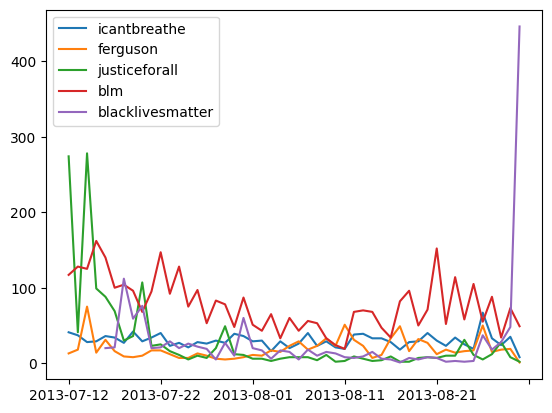

In [228]:
#Using Pandas plot feature for static graph, initial visualization 

new.plot()

In [242]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px


    
app = Dash(__name__)

app.layout = html.Div([
    html.H4('Analysis of Iris data using scatter matrix'),
    dcc.Dropdown(
        id="dropdown",
        options=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
        value=['sepal_length', 'sepal_width'],
        multi=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(dims):
    df = px.data.iris() # replace with your own data source
    fig = px.scatter_matrix(
        df, dimensions=dims, color="species")
    return fig


app.run(host='0.0.0.0', port=8030, debug=True)


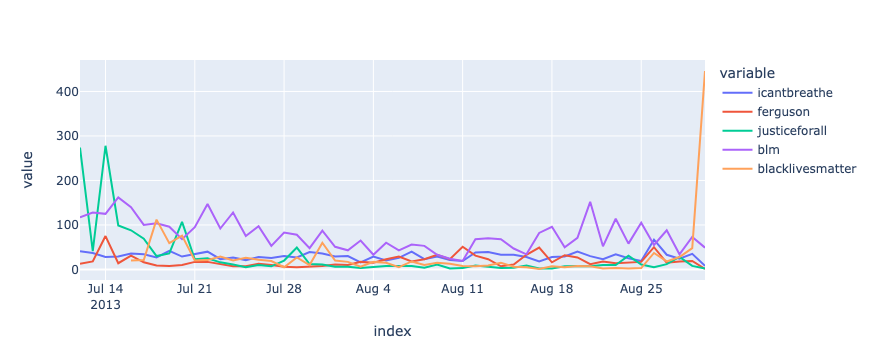

In [246]:
import plotly.express as px

import pandas as pd
pd.options.plotting.backend = "plotly"

#df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
fig = new.plot()
fig.show()



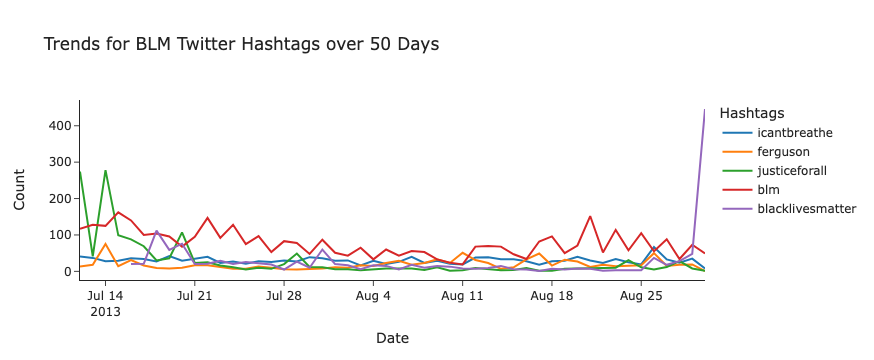

In [248]:
fig = new.plot(title="Trends for BLM Twitter Hashtags over 50 Days", template="simple_white",
              labels=dict(index="Date", value="Count", variable="Hashtag1s"))
fig.show()

In [27]:
millionLines = []
with open("tweets-per-line.njson", 'r') as inputF:
    for i in range(1048500):
        line = inputF.readline()
        millionLines.append(json.loads(line))
        
million = pd.DataFrame(millionLines)

In [28]:
million.to_excel("tweet_data_large.xlsx")

In [18]:
#keeping track of count for hashtags
millHashtags = {}

for i in range(len(million)):
    current = million["hashtags"][i]
    for i in range(len(current)):
        if current[i] in millHashtags:
            millHashtags[current[i]] +=1
        else:
            millHashtags[current[i]] = 1
            
#iterating through keys in dict

millCommonHashtags = []

for key in millHashtags:
    if millHashtags[key]>25000:
        millCommonHashtags.append(key)
        
print(len(millCommonHashtags))
print(len(millHashtags))

31
343279


In [21]:
millCommonHashtags

['icantbreathe',
 'sayhername',
 'ferguson',
 'justice',
 'trayvonmartin',
 'blm',
 'walterscott',
 'mikebrown',
 '',
 'tcot',
 'blacklivesmatter',
 'nyc',
 'michaelbrown',
 'blacktwitter',
 'alllivesmatter',
 'johncrawford',
 'tonyrobinson',
 'nypd',
 'stl',
 'police',
 'baltimore',
 'policebrutality',
 'ericgarner',
 'justiceformikebrown',
 'handsupdontshoot',
 'darrenwilson',
 'tamirrice',
 'freddiegray',
 'baltimoreriots',
 'baltimoreuprising',
 'sandrabland']

In [9]:
from collections import defaultdict, Counter

In [23]:
hashtagsByDayMillion = defaultdict(Counter)
for i in range(len(million)):
    #spliting the time stamp to focus on day instead of time
    timestamp = million["created_at"][i]
    date = timestamp.split()[0]
    
    #getting list of hastags used in tweet
    allHashtags = million["hashtags"][i]
    
    #incrementing counter for the hashtag if it is one of the most common hashtags
    for tag in allHashtags:
        if (tag in millCommonHashtags):
            hashtagsByDayMillion[tag][date] += 1
            
dfForMillion = pd.DataFrame.from_dict(hashtagsByDayMillion) 

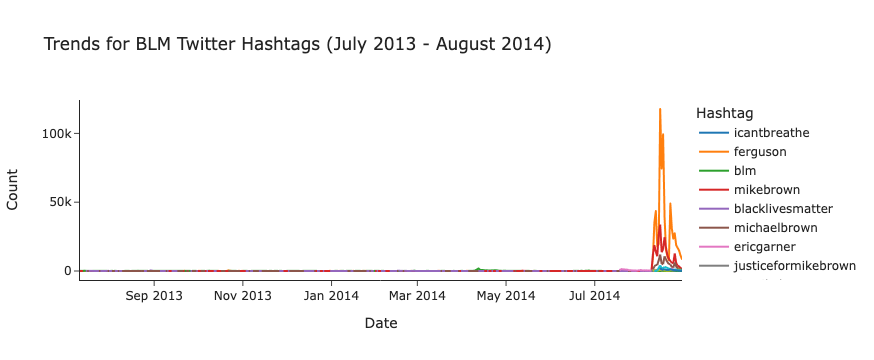

In [273]:
fig = dfForMillion.plot(title="Trends for BLM Twitter Hashtags (July 2013 - August 2014)", template="simple_white",
              labels=dict(index="Date", value="Count", variable="Hashtag"))
fig.show()

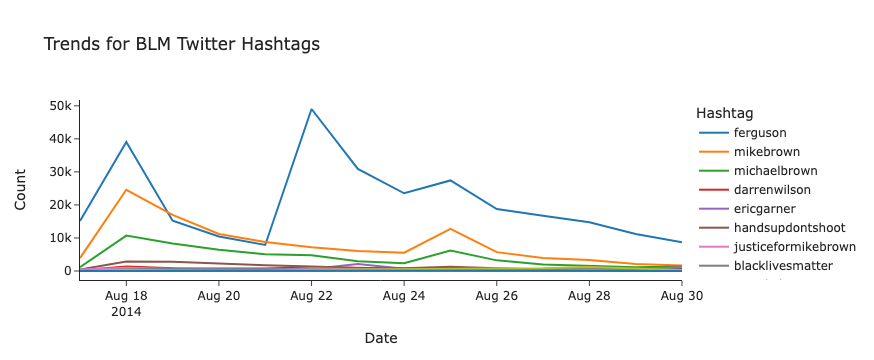

In [271]:
hashtagsByDayMillion = defaultdict(Counter)
for i in range(600000, 1000000):
    #spliting the time stamp to focus on day instead of time
    timestamp = million["created_at"][i]
    date = timestamp.split()[0]
    
    #getting list of hastags used in tweet
    allHashtags = million["hashtags"][i]
    
    #incrementing counter for the hashtag if it is one of the most common hashtags
    for tag in allHashtags:
        if (tag in millCommonHashtags):
            hashtagsByDayMillion[tag][date] += 1
            
dfForMillion400 = pd.DataFrame.from_dict(hashtagsByDayMillion) 

fig = dfForMillion400.plot(title="Trends for BLM Twitter Hashtags", template="simple_white",
              labels=dict(index="Date", value="Count", variable="Hashtag"))
fig.show()

In [267]:
hashtagsByDayMillion = defaultdict(Counter)
for i in range(400000, 1000000):
    #spliting the time stamp to focus on day instead of time
    timestamp = million["created_at"][i]
    date = timestamp.split()[0]
    
    #getting list of hastags used in tweet
    allHashtags = million["hashtags"][i]
    
    #incrementing counter for the hashtag if it is one of the most common hashtags
    for tag in allHashtags:
        if (tag in millCommonHashtags):
            hashtagsByDayMillion[tag][date] += 1
            
dfForMillion2 = pd.DataFrame.from_dict(hashtagsByDayMillion) 


In [24]:
dfForMillion.to_excel("tweethashtags2.xlsx")

In [12]:
ls

/bin/bash: /home/scott/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 all_users_sorted.csv    newtweets/              tweethashtags.xlsx
 dfForMillion.csv        oldtweets/              tweets-per-line.njson
'Group by users.ipynb'   Read_All_tweets.ipynb
 mydata.json             tweetdata.xlsx


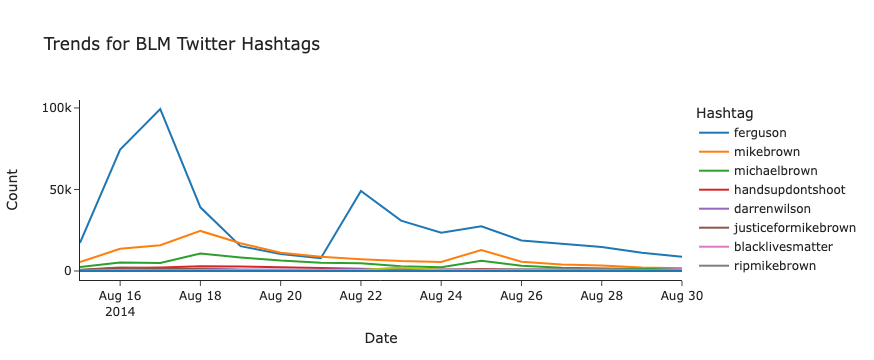

In [268]:
fig = dfForMillion2.plot(title="Trends for BLM Twitter Hashtags", template="simple_white",
              labels=dict(index="Date", value="Count", variable="Hashtag"))
fig.show()

In [278]:
dfForMillion

,icantbreathe,ferguson,blm,mikebrown,blacklivesmatter,michaelbrown,ericgarner,justiceformikebrown,ripmikebrown,handsupdontshoot,darrenwilson
2013-07-12,41,13,117,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-13,37,18,128,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-14,28,75,125,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-15,29,14,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-16,36,31,140,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2014-08-26,39,18754,42,5711.0,541.0,3224.0,499.0,445.0,795.0,814.0,598.0
2014-08-27,22,16712,31,3968.0,383.0,1934.0,422.0,631.0,800.0,463.0,335.0
2014-08-28,19,14783,33,3321.0,930.0,1501.0,304.0,470.0,1233.0,766.0,221.0
2014-08-29,75,11190,48,2120.0,482.0,1161.0,214.0,212.0,748.0,344.0,188.0


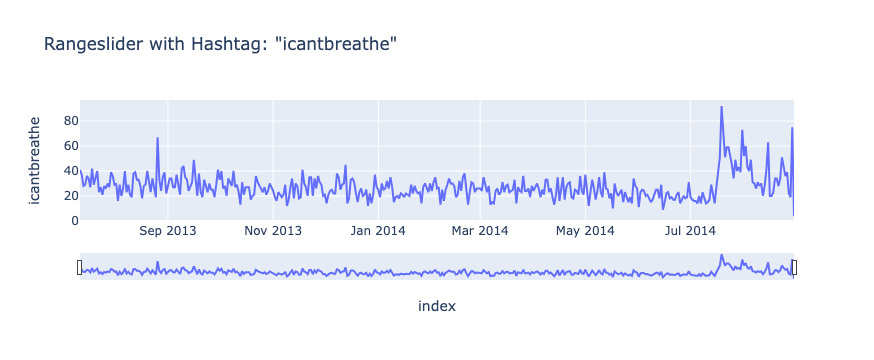

In [289]:
fig = px.line(dfForMillion, y='icantbreathe', title='Rangeslider with Hashtag: "icantbreathe"')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

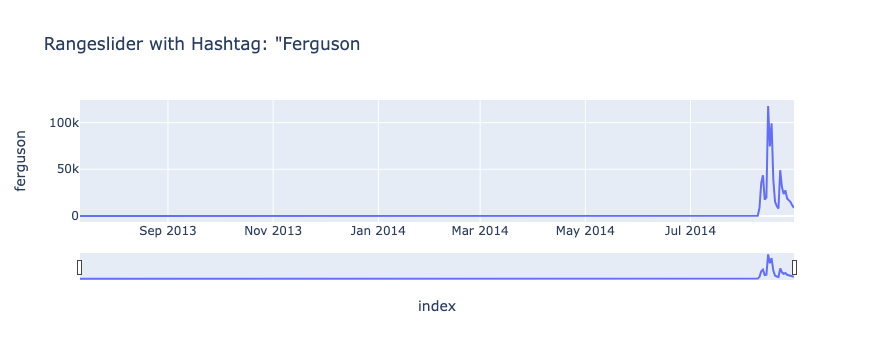

In [288]:
fig = px.line(dfForMillion, y='ferguson', title='Rangeslider with Hashtag: "Ferguson"')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

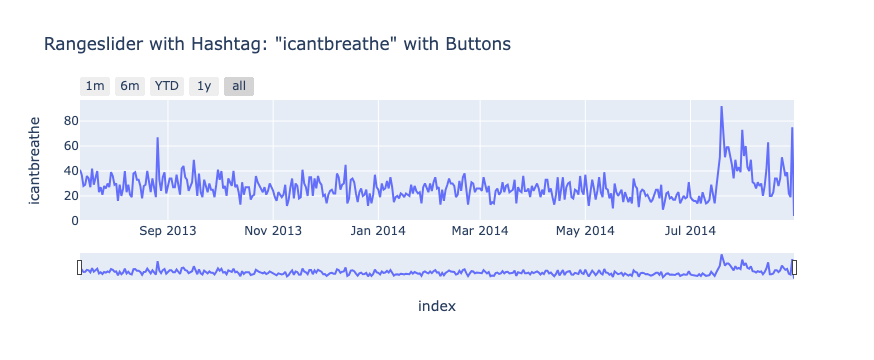

In [302]:
fig = px.line(dfForMillion, y='icantbreathe', title='Rangeslider with Hashtag: "icantbreathe" with Buttons')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [315]:
dfForMillion.info()



<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 2013-07-12 to 2014-08-30
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   icantbreathe         415 non-null    int64  
 1   ferguson             415 non-null    int64  
 2   blm                  415 non-null    int64  
 3   mikebrown            386 non-null    float64
 4   blacklivesmatter     347 non-null    float64
 5   michaelbrown         230 non-null    float64
 6   ericgarner           44 non-null     float64
 7   justiceformikebrown  22 non-null     float64
 8   ripmikebrown         21 non-null     float64
 9   handsupdontshoot     20 non-null     float64
 10  darrenwilson         16 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 38.9+ KB


In [318]:
dfNew = dfForMillion.iloc[375:415]
dfNew.head()


,icantbreathe,ferguson,blm,mikebrown,blacklivesmatter,michaelbrown,ericgarner,justiceformikebrown,ripmikebrown,handsupdontshoot,darrenwilson
2014-07-22,59,13,55,5.0,5.0,2.0,1026.0,NaN,NaN,NaN,NaN
2014-07-23,59,9,46,5.0,3.0,NaN,1058.0,NaN,NaN,NaN,NaN
2014-07-24,52,8,204,4.0,4.0,1.0,760.0,NaN,NaN,NaN,NaN
2014-07-25,45,12,152,3.0,10.0,3.0,479.0,NaN,NaN,NaN,NaN
2014-07-26,34,9,115,9.0,2.0,2.0,530.0,NaN,NaN,NaN,NaN


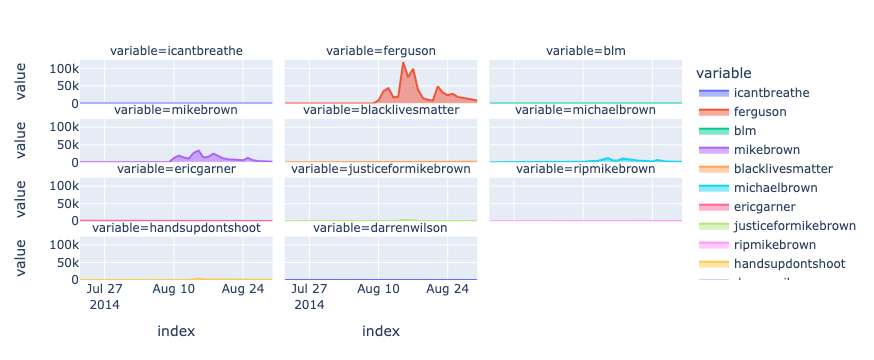

In [319]:
fig = px.area(dfNew, facet_col="variable", facet_col_wrap=3)
fig.show()

In [297]:
million.head()

,id,created_at,user,hashtags,text
0,355481540114911232,2013-07-12 00:19:38+00:00,cheynestokes_,"[backuphoe, icantbreathe]",This hoe found out I was single . . Been calli...
1,355481769367179264,2013-07-12 00:20:33+00:00,Roujeria,"[beyonce, solangeknowles, sayhername, belmont,...",#Beyonce 3 degrees of separation @akuamusic #s...
2,355485346726821888,2013-07-12 00:34:45+00:00,bmaggiemay,[ferguson],Auditor general’s report: $3 billion unexplain...
3,355489216781750273,2013-07-12 00:50:08+00:00,MarcMaverick,"[icantbreathe, sobeautiful, marryme]",The guy in Anjulie's You and I music video.......
4,355491587607896066,2013-07-12 00:59:33+00:00,GwalaDeNiro,"[justicefortrayvon, justiceforall, newblackrev...",#JusticeForTrayvon #JusticeForAll #NewBlackRev...


In [323]:
%%js
alert("hello, world!");


<IPython.core.display.Javascript object>

In [324]:
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [325]:
df.to_json("mydata.json")

In [326]:
ls

/bin/bash: /home/scott/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 all_users_sorted.csv    mydata.json   Read_All_tweets.ipynb
 dfForMillion.csv        newtweets/    tweets-per-line.njson
'Group by users.ipynb'   oldtweets/


In [332]:
df.to_excel("tweetdata.xlsx")

In [333]:
ls

/bin/bash: /home/scott/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 all_users_sorted.csv    mydata.json   Read_All_tweets.ipynb
 dfForMillion.csv        newtweets/    tweetdata.xlsx
'Group by users.ipynb'   oldtweets/    tweets-per-line.njson


In [331]:
pip install openpyxl

/bin/bash: /home/scott/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 6.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.
